Step 1: Data Cleaning
You have collected your data, time to further clean it.

A cleaned dataset is a dataset that doesn't contain any duplicates, has no blank spaces, and has no other obvious errors.<br> The rest of the analysis is worthless if you neglect this step; Garbage In, Garbage Out.

Take care of the following:

- No duplicates
- No blank spaces (e.g. " I love python " => "I love python")
- No empty values (set them to None or NaN)
- No wrongly encoded values (e.g. a text value in the price column)

In [5]:
import pandas as pd
import numpy as np
import csv

## Merge dataframes

In [6]:
immo_house = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RawData_house_sale.csv")
immo_apartment = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RawData_apartment_sale.csv")

In [7]:
merged = pd.concat([immo_house, immo_apartment])

# write to csv
import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
#merged.to_csv(os.path.join(path,r'RawData_merged.csv'))

#merged.to_csv("RawData_merged.csv")


## Exploring the DataFrame

In [8]:
display(immo_house.head(10))


Unnamed: 0                                                url          id  \
0           0  https://www.immoweb.be/en/classified/house/for...  11128213.0   
1           1  https://www.immoweb.be/en/classified/house/for...  11130920.0   
2           2  https://www.immoweb.be/en/classified/house/for...  11119431.0   
3           3  https://www.immoweb.be/en/classified/house/for...  11132583.0   
4           4  https://www.immoweb.be/en/classified/house/for...  10874763.0   
5           5  https://www.immoweb.be/en/classified/villa/for...  11135548.0   
6           6  https://www.immoweb.be/en/classified/house/for...  10768012.0   
7           7  https://www.immoweb.be/en/classified/house/for...  10927220.0   
8           8  https://www.immoweb.be/en/classified/house/for...  11006302.0   
9           9  https://www.immoweb.be/en/classified/house/for...  11130919.0   

     region       province             locality  zip_code  Longitude  \
0  Flanders  East Flanders             Wetteren    9230.0   3.884853   
1  Flanders  East Flanders                Ronse    9600.0   3.609445   
2  Flanders  East Flanders                Ronse    9600.0   3.613201   
3  Wallonie          Liège               Neupré    4121.0   5.488573   
4  Wallonie          Liège                  Ans    4430.0   5.519029   
5  Flanders  East Flanders                Ronse    9600.0   3.633878   
6  Wallonie          Liège               CHÊNÉE    4032.0   5.615752   
7  Wallonie          Liège            Wasseiges    4219.0   5.044013   
8  Wallonie          Liège  Villers-le-Bouillet    4530.0   5.269741   
9  Flanders  East Flanders                Ronse    9600.0   3.615662   

    Latitude property_type  ... garden_area  surface_land  number_facades  \
0  51.011410         HOUSE  ...         NaN          90.0             2.0   
1  50.740380         HOUSE  ...       350.0         555.0             3.0   
2  50.737229         HOUSE  ...       101.0         196.0             2.0   
3  50.548515         HOUSE  ...       500.0         601.0             3.0   
4  50.660049         HOUSE  ...       110.0         261.0             2.0   
5  50.741927         HOUSE  ...       351.0         674.0             3.0   
6  50.607251         HOUSE  ...       720.0         915.0             2.0   
7  50.630242         HOUSE  ...       300.0         405.0             2.0   
8  50.565606         HOUSE  ...       170.0         435.0             4.0   
9  50.747759         HOUSE  ...         NaN         100.0             2.0   

   swimming_pool building_state energy_type  EPC_score  \
0          False           GOOD         GAS          B   
1          False  TO_BE_DONE_UP     FUELOIL          F   
2          False         AS_NEW         GAS          A   
3          False           GOOD     FUELOIL          E   
4          False           GOOD         GAS          G   
5          False    TO_RENOVATE         GAS          E   
6            NaN    TO_RENOVATE         GAS          F   
7          False         AS_NEW      PELLET          C   
8          False           GOOD         GAS          D   
9          False         AS_NEW         GAS          C   

  EnergyConsumptionPerSqm  parking_outdoor parking_indoor  
0                   193.0              NaN            NaN  
1                   737.0              3.0            1.0  
2                    57.0              NaN            NaN  
3                   348.0              NaN            1.0  
4                   577.0              NaN            NaN  
5                   471.0              5.0            1.0  
6                   479.0              NaN            NaN  
7                   219.0              2.0            NaN  
8                   309.0              NaN            1.0  
9                   251.0              NaN            NaN  

[10 rows x 30 columns]

In [9]:
immo_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               19980 non-null  int64  
 1   url                      19736 non-null  object 
 2   id                       19736 non-null  float64
 3   region                   19697 non-null  object 
 4   province                 19697 non-null  object 
 5   locality                 19736 non-null  object 
 6   zip_code                 19736 non-null  float64
 7   Longitude                16784 non-null  float64
 8   Latitude                 16784 non-null  float64
 9   property_type            19736 non-null  object 
 10  property_subtype         19736 non-null  object 
 11  price                    18794 non-null  float64
 12  number_rooms             18795 non-null  float64
 13  living_area              17900 non-null  float64
 14  kitchen               

In [10]:
immo_house.shape

(19980, 30)

In [11]:
immo_house.describe()

Unnamed: 0            id      zip_code     Longitude      Latitude  \
count  19980.000000  1.973600e+04  19736.000000  16784.000000  16784.000000   
mean    9989.500000  1.106375e+07   5257.617856      4.323839     50.875521   
std     5767.873525  2.221706e+05   3246.267291      0.781049      0.331030   
min        0.000000  6.349237e+06   1000.000000      2.372534     44.082694   
25%     4994.750000  1.105059e+07   2260.000000      3.730601     50.716830   
50%     9989.500000  1.115271e+07   4540.000000      4.364035     50.906474   
75%    14984.250000  1.116395e+07   8510.000000      4.823802     51.120377   
max    19979.000000  1.117488e+07  59270.000000      6.236419     51.487429   

              price  number_rooms   living_area    fireplace  terrace_area  \
count  1.879400e+04  18795.000000  17900.000000  3935.000000   6493.000000   
mean   4.821232e+05      3.337749    203.401453    -0.501906     32.462806   
std    5.461876e+05      1.841113    185.396423     0.888516    104.838795   
min    2.300000e+04      0.000000     12.000000    -1.000000      1.000000   
25%    2.490000e+05      2.000000    120.000000    -1.000000     12.000000   
50%    3.490000e+05      3.000000    167.000000    -1.000000     20.000000   
75%    5.139108e+05      4.000000    233.000000    -1.000000     36.000000   
max    1.145000e+07     36.000000   8073.000000     8.000000   6550.000000   

         garden_area   surface_land  number_facades  EnergyConsumptionPerSqm  \
count    5654.000000   15254.000000    14964.000000             1.625800e+04   
mean      749.643969    1168.940081        2.914662             1.611543e+03   
std      3342.175923    8594.455578        0.863544             1.586702e+05   
min         1.000000       0.000000        1.000000            -3.600000e+01   
25%        85.000000     168.000000        2.000000             1.850000e+02   
50%       227.000000     388.000000        3.000000             2.900000e+02   
75%       630.000000     894.000000        4.000000             4.340000e+02   
max    150000.000000  917440.000000        8.000000             2.023112e+07   

       parking_outdoor  parking_indoor  
count      6967.000000     8765.000000  
mean          3.436773        1.640730  
std          24.118653        2.754476  
min           1.000000        1.000000  
25%           1.000000        1.000000  
50%           2.000000        1.000000  
75%           4.000000        2.000000  
max        1970.000000       72.000000

## Components of the DF

In [12]:
immo_house.values

array([[0,
        'https://www.immoweb.be/en/classified/house/for-sale/wetteren/9230/11128213',
        11128213.0, ..., 193.0, nan, nan],
       [1,
        'https://www.immoweb.be/en/classified/house/for-sale/ronse/9600/11130920',
        11130920.0, ..., 737.0, 3.0, 1.0],
       [2,
        'https://www.immoweb.be/en/classified/house/for-sale/ronse/9600/11119431',
        11119431.0, ..., 57.0, nan, nan],
       ...,
       [19977,
        'https://www.immoweb.be/en/classified/apartment/for-sale/ganshoren/1083/11151062',
        11151062.0, ..., 141.0, nan, nan],
       [19978,
        'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/11151061',
        11151061.0, ..., nan, nan, 1.0],
       [19979,
        'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/11151060',
        11151060.0, ..., nan, nan, 1.0]], dtype=object)

In [13]:
immo_house.columns

Index(['Unnamed: 0', 'url', 'id', 'region', 'province', 'locality', 'zip_code',
       'Longitude', 'Latitude', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'energy_type',
       'EPC_score', 'EnergyConsumptionPerSqm', 'parking_outdoor',
       'parking_indoor'],
      dtype='object')

In [14]:
immo_house.index


RangeIndex(start=0, stop=19980, step=1)

## Check Missing values

In [15]:
# detect missing values
immo_house.isna()
# detect any missing values
immo_house.isna().any()
# count missing values
immo_house.isna().sum()
# sort sum of missing values
missing_sorted = immo_house.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

fireplace                  16045
garden_area                14326
garden                     13562
terrace_area               13487
swimming_pool              13451
furnished                  13218
parking_outdoor            13013
parking_indoor             11215
terrace                     9142
energy_type                 5863
building_state              5551
number_facades              5016
surface_land                4726
EnergyConsumptionPerSqm     3722
EPC_score                   3354
Latitude                    3196
Longitude                   3196
kitchen                     2456
living_area                 2080
price                       1186
number_rooms                1185
province                     283
region                       283
id                           244
locality                     244
property_type                244
zip_code                     244
url                          244
property_subtype             244
Unnamed: 0                     0
dtype: int

pandas.core.series.Series

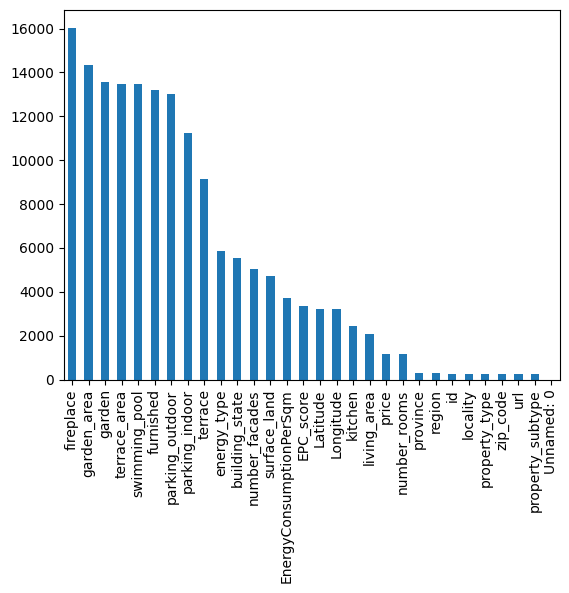

In [16]:
# Plotting missing values
import matplotlib.pyplot as plt
missing_sorted.plot(kind='bar')
plt.show()

## Remove columns

In [17]:
# Remove 6 columns that have the most missing values:
#['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area']
remove_columns = missing_sorted ['garden_area':'terrace_area']
display(remove_columns)
print(type(remove_columns))


garden_area     14326
garden          13562
terrace_area    13487
dtype: int64

<class 'pandas.core.series.Series'>


In [18]:
#immo_drop = immo_df.drop(columns = [remove_columns], inplace=True)
#print(immo_drop)

In [19]:
#immo_df.drop(columns = ['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area'], inplace=True)
#display(immo_df)

## Remove duplicates: there are no duplicates in the raw data

## Check for blank spaces in strings

## Check for empty values: 

In [20]:
#immo_null = immo_drop_dup.isnull() #is the same as isna()
#display(immo_null)
#immo_nan = immo_drop_dup.replace('', np.nan, inplace=False)
#display(immo_nan)

In [21]:
display(immo_house.isnull().sum().sort_values(ascending=False)) # check numbers of null value in each column
#immo_nan = immo_house.fillna("NaN") # Replace empty/null values with "NaN"
#display(immo_nan.isnull().sum()) # check numbers of null value in each column
#display(immo_nan)

fireplace                  16045
garden_area                14326
garden                     13562
terrace_area               13487
swimming_pool              13451
furnished                  13218
parking_outdoor            13013
parking_indoor             11215
terrace                     9142
energy_type                 5863
building_state              5551
number_facades              5016
surface_land                4726
EnergyConsumptionPerSqm     3722
EPC_score                   3354
Latitude                    3196
Longitude                   3196
kitchen                     2456
living_area                 2080
price                       1186
number_rooms                1185
province                     283
region                       283
id                           244
locality                     244
property_type                244
zip_code                     244
url                          244
property_subtype             244
Unnamed: 0                     0
dtype: int

## Remove rows with missing values

In [22]:
# Function to drop observations with missing 'id' and 'price'
def drop_missing_values(df):
    """
    Drop observations with missing values in 'id' and 'price' columns.
    Parameters:
    - df: pandas DataFrame, the DataFrame to be cleaned
    Returns:
    - pandas DataFrame, the cleaned DataFrame
    """
    # Drop missing observations for 'id' and 'price' columns
    df_cleaned = df.dropna(subset=['id', 'price', 'province', 'region'])

    # Check if there are any missing values left in 'id' and 'price' columns
    if df_cleaned['id'].isnull().any() or df_cleaned['price'].isnull().any() or df_cleaned['province'].isnull().any() or df_cleaned['region'].isnull().any():
        print("Warning: Missing values still present after dropping.")
    else:
        print("Missing values in 'id', 'price', 'province' and 'region' successfully dropped.")

    return df_cleaned

# Replace 'house' with the actual name of your DataFrame
house_cleaned = drop_missing_values(immo_house)
display(house_cleaned.head())

# Save the cleaned DataFrame as 'house_cleaned.csv' in the 'Data' folder

import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
house_cleaned.to_csv(os.path.join(path,r'house_cleaned.csv'))
#house_cleaned.to_csv(os.path.join(data_folder, 'house_cleaned.csv'), index=False)


Missing values in 'id', 'price', 'province' and 'region' successfully dropped.


Unnamed: 0                                                url          id  \
0           0  https://www.immoweb.be/en/classified/house/for...  11128213.0   
1           1  https://www.immoweb.be/en/classified/house/for...  11130920.0   
2           2  https://www.immoweb.be/en/classified/house/for...  11119431.0   
3           3  https://www.immoweb.be/en/classified/house/for...  11132583.0   
4           4  https://www.immoweb.be/en/classified/house/for...  10874763.0   

     region       province  locality  zip_code  Longitude   Latitude  \
0  Flanders  East Flanders  Wetteren    9230.0   3.884853  51.011410   
1  Flanders  East Flanders     Ronse    9600.0   3.609445  50.740380   
2  Flanders  East Flanders     Ronse    9600.0   3.613201  50.737229   
3  Wallonie          Liège    Neupré    4121.0   5.488573  50.548515   
4  Wallonie          Liège       Ans    4430.0   5.519029  50.660049   

  property_type  ... garden_area  surface_land  number_facades  swimming_pool  \
0         HOUSE  ...         NaN          90.0             2.0          False   
1         HOUSE  ...       350.0         555.0             3.0          False   
2         HOUSE  ...       101.0         196.0             2.0          False   
3         HOUSE  ...       500.0         601.0             3.0          False   
4         HOUSE  ...       110.0         261.0             2.0          False   

  building_state energy_type  EPC_score EnergyConsumptionPerSqm  \
0           GOOD         GAS          B                   193.0   
1  TO_BE_DONE_UP     FUELOIL          F                   737.0   
2         AS_NEW         GAS          A                    57.0   
3           GOOD     FUELOIL          E                   348.0   
4           GOOD         GAS          G                   577.0   

   parking_outdoor parking_indoor  
0              NaN            NaN  
1              3.0            1.0  
2              NaN            NaN  
3              NaN            1.0  
4              NaN            NaN  

[5 rows x 30 columns]

## Filter the dataframe

In [23]:
print(house_cleaned['property_type'])
import pandas as pd

# Filter the DataFrame to keep only rows where the property subtype is "HOUSE"
house_cleaned1 = house_cleaned[house_cleaned['property_type'] == 'HOUSE']
house_cleaned2 = house_cleaned1[house_cleaned1['property_subtype'] != 'APARTMENT_BLOCK']

# Display the filtered DataFrame
display(house_cleaned1.head())


0            HOUSE
1            HOUSE
2            HOUSE
3            HOUSE
4            HOUSE
           ...    
19975        HOUSE
19976        HOUSE
19977    APARTMENT
19978    APARTMENT
19979    APARTMENT
Name: property_type, Length: 18758, dtype: object


Unnamed: 0                                                url          id  \
0           0  https://www.immoweb.be/en/classified/house/for...  11128213.0   
1           1  https://www.immoweb.be/en/classified/house/for...  11130920.0   
2           2  https://www.immoweb.be/en/classified/house/for...  11119431.0   
3           3  https://www.immoweb.be/en/classified/house/for...  11132583.0   
4           4  https://www.immoweb.be/en/classified/house/for...  10874763.0   

     region       province  locality  zip_code  Longitude   Latitude  \
0  Flanders  East Flanders  Wetteren    9230.0   3.884853  51.011410   
1  Flanders  East Flanders     Ronse    9600.0   3.609445  50.740380   
2  Flanders  East Flanders     Ronse    9600.0   3.613201  50.737229   
3  Wallonie          Liège    Neupré    4121.0   5.488573  50.548515   
4  Wallonie          Liège       Ans    4430.0   5.519029  50.660049   

  property_type  ... garden_area  surface_land  number_facades  swimming_pool  \
0         HOUSE  ...         NaN          90.0             2.0          False   
1         HOUSE  ...       350.0         555.0             3.0          False   
2         HOUSE  ...       101.0         196.0             2.0          False   
3         HOUSE  ...       500.0         601.0             3.0          False   
4         HOUSE  ...       110.0         261.0             2.0          False   

  building_state energy_type  EPC_score EnergyConsumptionPerSqm  \
0           GOOD         GAS          B                   193.0   
1  TO_BE_DONE_UP     FUELOIL          F                   737.0   
2         AS_NEW         GAS          A                    57.0   
3           GOOD     FUELOIL          E                   348.0   
4           GOOD         GAS          G                   577.0   

   parking_outdoor parking_indoor  
0              NaN            NaN  
1              3.0            1.0  
2              NaN            NaN  
3              NaN            1.0  
4              NaN            NaN  

[5 rows x 30 columns]

In [24]:
# Explore house_cleaned2
house_cleaned2.shape
house_cleaned2.count()
house_cleaned2.info()
house_cleaned2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 14513 entries, 0 to 19976
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               14513 non-null  int64  
 1   url                      14513 non-null  object 
 2   id                       14513 non-null  float64
 3   region                   14513 non-null  object 
 4   province                 14513 non-null  object 
 5   locality                 14513 non-null  object 
 6   zip_code                 14513 non-null  float64
 7   Longitude                12347 non-null  float64
 8   Latitude                 12347 non-null  float64
 9   property_type            14513 non-null  object 
 10  property_subtype         14513 non-null  object 
 11  price                    14513 non-null  float64
 12  number_rooms             14513 non-null  float64
 13  living_area              13852 non-null  float64
 14  kitchen                  12

Unnamed: 0            id      zip_code     Longitude      Latitude  \
count  14513.000000  1.451300e+04  14513.000000  12347.000000  12347.000000   
mean   10110.555157  1.106228e+07   5431.239854      4.343672     50.846751   
std     5718.777143  1.820299e+05   3042.295023      0.795019      0.331657   
min        0.000000  7.710166e+06   1000.000000      2.372534     48.824985   
25%     5242.000000  1.102985e+07   2560.000000      3.726883     50.670817   
50%    10200.000000  1.114030e+07   5000.000000      4.361041     50.882726   
75%    15027.000000  1.116217e+07   8560.000000      4.913027     51.085230   
max    19976.000000  1.117488e+07   9992.000000      6.236419     51.487429   

              price  number_rooms   living_area    fireplace  terrace_area  \
count  1.451300e+04  14513.000000  13852.000000  2983.000000   4539.000000   
mean   5.062578e+05      3.580790    221.691380    -0.376467     36.620621   
std    5.794211e+05      1.612373    180.539562     0.955451     76.397188   
min    2.300000e+04      0.000000     16.000000    -1.000000      1.000000   
25%    2.599000e+05      3.000000    142.000000    -1.000000     15.000000   
50%    3.710000e+05      3.000000    180.000000    -1.000000     25.000000   
75%    5.390000e+05      4.000000    248.000000     1.000000     40.000000   
max    1.145000e+07     35.000000   8073.000000     8.000000   3466.000000   

         garden_area   surface_land  number_facades  EnergyConsumptionPerSqm  \
count    5233.000000   14513.000000    12100.000000             1.285100e+04   
mean      781.419645    1206.590023        3.021074             1.971837e+03   
std      3448.884494    8805.164701        0.857652             1.784674e+05   
min         1.000000       0.000000        1.000000            -3.600000e+01   
25%        96.000000     176.000000        2.000000             2.110000e+02   
50%       250.000000     405.000000        3.000000             3.180000e+02   
75%       665.000000     917.000000        4.000000             4.620000e+02   
max    150000.000000  917440.000000        8.000000             2.023112e+07   

       parking_outdoor  parking_indoor  
count      5990.000000     7588.000000  
mean          3.412020        1.525962  
std          25.634578        1.923949  
min           1.000000        1.000000  
25%           1.000000        1.000000  
50%           2.000000        1.000000  
75%           4.000000        2.000000  
max        1970.000000       67.000000

## Transform /fill missing values in the numeric column with the median of each group.

In [25]:
# Function to Sort the DataFrame by the categorical column, then transform /fill missing values in the numeric column with the median of each group.

from IPython.display import display

def impute_missing_by_group_median(df, categorical_column, numeric_column):
    """
    Impute missing values in a numeric column by the median of each categorical group.
    Parameters:
        df (DataFrame): Input DataFrame.
        categorical_column (str): Name of the categorical column for grouping.
        numeric_column (str): Name of the numeric column with missing values to be imputed.
    Returns:
        DataFrame: DataFrame with missing values imputed by group median.
    """
    # Check if the specified columns exist in the DataFrame
    if categorical_column not in df.columns or numeric_column not in df.columns:
        print(f"Error: One or more specified columns not found in the DataFrame.")
        return df

    # Sort DataFrame by the categorical column
    df_sorted = df.sort_values(by=categorical_column)

    # Print the summary of 'living_area' by 'number_rooms' before imputation
    summary_before = df_sorted.groupby(categorical_column)[numeric_column].describe()
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' before imputation:")
    display(summary_before)

    # Print the number of missing values before imputation
    missing_values_before = df_sorted[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' before imputation: {missing_values_before}")

    # Impute missing values by group median
    df_imputed = df_sorted.copy()
    df_imputed[numeric_column] = df_sorted.groupby(categorical_column)[numeric_column].transform(lambda x: x.fillna(x.median()))

    # Print the number of missing values after imputation
    missing_values_after = df_imputed[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' after imputation: {missing_values_after}")

    # Display the summary of 'living_area' by 'number_rooms' after imputation
    summary_after = df_imputed.groupby(categorical_column)[numeric_column].describe(include='all')
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' after imputation:")
    display(summary_after)

    # Display the resulting DataFrame for 'number_rooms' = 1 after imputation
    result_df = df_imputed[df_imputed[categorical_column] == 1][['number_rooms', numeric_column]]
    display(result_df)

    return df_imputed

# Example usage:
# Assuming df_filtered is your DataFrame and you want to impute missing values in 'living_area' by 'number_rooms'
house_imputed = impute_missing_by_group_median(house_cleaned2, categorical_column='number_rooms', numeric_column='living_area')


Summary of 'living_area' by 'number_rooms' before imputation:


count         mean          std     min      25%     50%  \
number_rooms                                                              
0.0            102.0   433.911765   472.786643    30.0   182.50   314.5   
1.0            202.0   121.485149   103.925166    29.0    69.00    90.0   
2.0           1873.0   139.872397   133.072033    25.0    98.00   120.0   
3.0           5606.0   178.694613    77.868183    16.0   137.00   164.0   
4.0           3597.0   227.017237   106.624338    70.0   168.00   201.0   
5.0           1502.0   307.133822   147.451683   110.0   212.25   270.0   
6.0            526.0   382.699620   177.200755   124.0   266.25   340.0   
7.0            214.0   453.023364   238.499012   155.0   299.25   388.0   
8.0            100.0   437.350000   176.272366   165.0   307.50   394.5   
9.0             36.0   588.194444   301.619232   260.0   389.75   487.5   
10.0            27.0   695.740741   572.495052   200.0   399.00   514.0   
11.0            11.0   806.727273   386.658529   370.0   430.50   770.0   
12.0            13.0   595.384615   360.756968   250.0   382.00   505.0   
13.0             5.0   658.800000   287.276348   352.0   360.00   737.0   
14.0             3.0   925.666667   279.081231   707.0   768.50   830.0   
15.0             6.0   695.833333   112.268280   650.0   650.00   650.0   
16.0             3.0  1013.666667   396.617364   705.0   790.00   875.0   
17.0             3.0   889.666667   164.991919   703.0   826.50   950.0   
18.0             3.0  2860.000000  1974.537921   580.0  2290.00  4000.0   
19.0             5.0  2622.200000  3061.871438   959.0   959.00  1560.0   
20.0             4.0  1847.500000   755.926584   950.0  1602.50  1820.0   
21.0             1.0   665.000000          NaN   665.0   665.00   665.0   
23.0             1.0  1405.000000          NaN  1405.0  1405.00  1405.0   
25.0             1.0  1120.000000          NaN  1120.0  1120.00  1120.0   
28.0             4.0  1200.000000     0.000000  1200.0  1200.00  1200.0   
30.0             3.0  1084.000000   360.266568   876.0   876.00   876.0   
35.0             1.0  5596.000000          NaN  5596.0  5596.00  5596.0   

                  75%     max  
number_rooms                   
0.0            508.50  3995.0  
1.0            131.00   700.0  
2.0            152.00  4002.0  
3.0            200.00  1653.0  
4.0            254.00  1680.0  
5.0            345.00  1390.0  
6.0            450.00  1290.0  
7.0            529.25  1813.0  
8.0            524.00   900.0  
9.0            728.75  1699.0  
10.0           887.50  3255.0  
11.0          1250.00  1250.0  
12.0           676.00  1600.0  
13.0           895.00   950.0  
14.0          1035.00  1240.0  
15.0           650.00   925.0  
16.0          1168.00  1461.0  
17.0           983.00  1016.0  
18.0          4000.00  4000.0  
19.0          1560.00  8073.0  
20.0          2065.00  2800.0  
21.0           665.00   665.0  
23.0          1405.00  1405.0  
25.0          1120.00  1120.0  
28.0          1200.00  1200.0  
30.0          1188.00  1500.0  
35.0          5596.00  5596.0

Number of missing values in 'living_area' before imputation: 661
Number of missing values in 'living_area' after imputation: 0

Summary of 'living_area' by 'number_rooms' after imputation:


count         mean          std     min      25%     50%  \
number_rooms                                                              
0.0            127.0   410.405512   425.968126    30.0   220.00   314.5   
1.0            220.0   118.909091    99.937702    29.0    70.00    90.0   
2.0           1970.0   138.893909   129.824092    25.0   100.00   120.0   
3.0           5920.0   177.915203    75.846148    16.0   139.00   164.0   
4.0           3728.0   226.103004   104.843247    70.0   170.00   201.0   
5.0           1541.0   306.194030   145.689487   110.0   213.00   270.0   
6.0            538.0   381.747212   175.323312   124.0   268.50   340.0   
7.0            226.0   449.570796   232.511518   155.0   300.00   388.0   
8.0            107.0   434.546729   170.684934   165.0   317.00   394.5   
9.0             40.0   578.125000   287.366351   260.0   394.00   487.5   
10.0            27.0   695.740741   572.495052   200.0   399.00   514.0   
11.0            12.0   803.666667   368.816863   370.0   438.25   770.0   
12.0            13.0   595.384615   360.756968   250.0   382.00   505.0   
13.0             5.0   658.800000   287.276348   352.0   360.00   737.0   
14.0             3.0   925.666667   279.081231   707.0   768.50   830.0   
15.0             6.0   695.833333   112.268280   650.0   650.00   650.0   
16.0             4.0   979.000000   331.175683   705.0   832.50   875.0   
17.0             3.0   889.666667   164.991919   703.0   826.50   950.0   
18.0             3.0  2860.000000  1974.537921   580.0  2290.00  4000.0   
19.0             5.0  2622.200000  3061.871438   959.0   959.00  1560.0   
20.0             4.0  1847.500000   755.926584   950.0  1602.50  1820.0   
21.0             1.0   665.000000          NaN   665.0   665.00   665.0   
23.0             1.0  1405.000000          NaN  1405.0  1405.00  1405.0   
25.0             1.0  1120.000000          NaN  1120.0  1120.00  1120.0   
28.0             4.0  1200.000000     0.000000  1200.0  1200.00  1200.0   
30.0             3.0  1084.000000   360.266568   876.0   876.00   876.0   
35.0             1.0  5596.000000          NaN  5596.0  5596.00  5596.0   

                 75%     max  
number_rooms                  
0.0            420.0  3995.0  
1.0            130.0   700.0  
2.0            150.0  4002.0  
3.0            196.0  1653.0  
4.0            252.0  1680.0  
5.0            340.0  1390.0  
6.0            450.0  1290.0  
7.0            525.0  1813.0  
8.0            515.0   900.0  
9.0            684.0  1699.0  
10.0           887.5  3255.0  
11.0          1250.0  1250.0  
12.0           676.0  1600.0  
13.0           895.0   950.0  
14.0          1035.0  1240.0  
15.0           650.0   925.0  
16.0          1021.5  1461.0  
17.0           983.0  1016.0  
18.0          4000.0  4000.0  
19.0          1560.0  8073.0  
20.0          2065.0  2800.0  
21.0           665.0   665.0  
23.0          1405.0  1405.0  
25.0          1120.0  1120.0  
28.0          1200.0  1200.0  
30.0          1188.0  1500.0  
35.0          5596.0  5596.0

number_rooms  living_area
4948            1.0         70.0
16151           1.0        564.0
11563           1.0        150.0
14548           1.0         80.0
11586           1.0        197.0
...             ...          ...
12423           1.0        132.0
13154           1.0         70.0
12414           1.0         61.0
19879           1.0        108.0
3964            1.0         29.0

[220 rows x 2 columns]

## Check for Unique or missing values

### Analysis of parking_indoor, parking_outdoor, surface_land, number_facades, surface_land

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_indoor = analyze_column(immo_house, "parking_indoor")


Analysis for column 'parking_indoor':
Number of NaN values: 11215
Number of unique values: 37
Percentage of NaN values: 56.13%
Percentage of unique values: 0.19%
Unique values: [nan  1. 12.  3.  2. 10.  5.  4.  8. 20.  7.  9.  6. 72. 32. 11. 47. 67.
 14. 21. 13. 26. 33. 31. 25. 50. 15. 16. 60. 24. 51. 45. 68. 30. 44. 22.
 23. 18.]


In [28]:
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column_name, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels by 45 degrees
    plt.tight_layout()  # Adjust layout to prevent overlapping,
    plt.show()

# parking_indoor = plot_histogram(immo_house, "parking_outdoor")

In [29]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_outdoor = analyze_column(immo_house, "parking_outdoor")

Analysis for column 'parking_outdoor':
Number of NaN values: 13013
Number of unique values: 35
Percentage of NaN values: 65.13%
Percentage of unique values: 0.18%
Unique values: [     nan 3.00e+00 5.00e+00 2.00e+00 4.00e+00 1.00e+00 6.00e+00 1.00e+01
 1.40e+01 8.00e+00 3.00e+01 7.00e+00 1.50e+01 1.97e+03 2.00e+01 1.20e+01
 2.20e+01 2.30e+01 9.00e+00 3.20e+01 1.10e+01 1.60e+01 5.00e+01 1.55e+02
 3.50e+01 3.30e+01 1.20e+02 3.10e+01 2.90e+01 2.50e+01 4.00e+01 6.00e+01
 2.40e+01 1.70e+01 4.40e+01 1.80e+01]


In [30]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

number_facades = analyze_column(immo_house, "number_facades")

Analysis for column 'number_facades':
Number of NaN values: 5016
Number of unique values: 8
Percentage of NaN values: 25.11%
Percentage of unique values: 0.04%
Unique values: [ 2.  3.  4. nan  6.  1.  8.  5.  7.]


In [31]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

price = analyze_column(immo_house, "price")

Analysis for column 'price':
Number of NaN values: 1186
Number of unique values: 1740
Percentage of NaN values: 5.94%
Percentage of unique values: 8.71%
Unique values: [ 249000.  249900.  259000. ... 2650000.  259636.   42500.]


In [32]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

surface_land = analyze_column(immo_house, "surface_land")

Analysis for column 'surface_land':
Number of NaN values: 4726
Number of unique values: 2514
Percentage of NaN values: 23.65%
Percentage of unique values: 12.58%
Unique values: [  90.  555.  196. ... 7215. 5044. 3125.]


In [33]:
#showing outliers
def scatter_plot(data, column_name):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=house_cleaned, x=column_name, y="price", color='skyblue')
        plt.title(f'Scatter Plot of {column_name}')
        plt.xlabel(f'{column_name}')
        plt.ylabel('price')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#number_facades = scatter_plot(house_cleaned, "parking_outdoor")

## Show and remove outliers

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]

for col in cols:
    # Calculate the z-score for col in cols
    z = np.abs(stats.zscore(house_cleaned2[col]))

    # Identify outliers with a z-score greater than 3
    threshold = 3
    outliers = house_cleaned2[z > threshold]

    # drop rows containing outliers
    house_cleaned_outliers = house_cleaned2.drop(outliers.index)

    # replace outliers with median value
    house_cleaned_median = house_cleaned2.loc[z > threshold, col] = house_cleaned2[col].median()

# calculate IQR for col in cols
for col in cols:
    Q1 = house_cleaned2[col].quantile(0.25)
    Q3 = house_cleaned2[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col,':', IQR)

# identify outliers
threshold = 1.5
outliers = house_cleaned2[(house_cleaned2[col] < Q1 - threshold * IQR) | (house_cleaned2[col] > Q3 + threshold * IQR)]


number_rooms : 1.0
living_area : 106.0
fireplace : 2.0
terrace_area : 25.0
garden_area : 569.0
surface_land : 726.0
number_facades : 2.0
EnergyConsumptionPerSqm : 251.0
parking_outdoor : 3.0
parking_indoor : 1.0


<Axes: title={'center': 'surface_land'}, xlabel='price'>

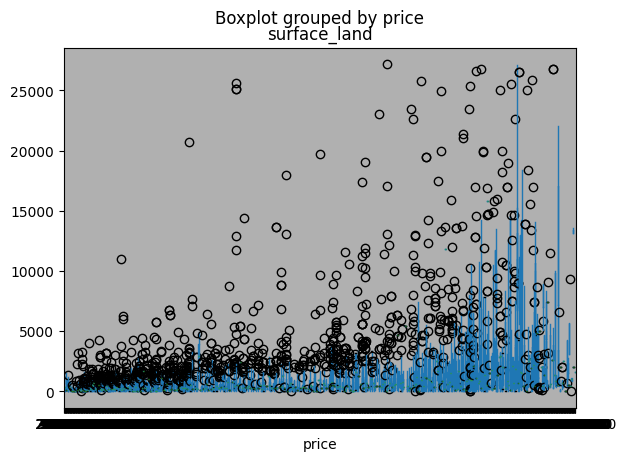

In [35]:
house_cleaned2.boxplot(column=['surface_land'], by='price')

In [36]:
for col in cols:
    hist = px.histogram(house_cleaned_outliers, x=col, y='price')
    hist.show()

In [37]:
for col in cols:
    box = px.box(house_cleaned_outliers, y=col)
    box.show()

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]
for col in cols:
    scatter = px.scatter(house_cleaned2, x='property_subtype', y=col)
    scatter.show()

In [39]:
scatter = px.scatter(house_cleaned, x='property_subtype', y='price')
scatter.show()

In [40]:
def remove_outliers_zscore(df, column_name, threshold=3):
    """
    Remove outliers from a DataFrame based on the Z-score method.

    Parameters:
        df (DataFrame): Input DataFrame.
        column_name (str): Name of the column containing the data points.
        threshold (float): Z-score threshold for identifying outliers. Default is 3.

    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Calculate Z-scores for the specified column
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    
    # Create a mask to identify outliers
    outlier_mask = np.abs(z_scores) > threshold
    
    print(outlier_mask)

    # Remove outliers from the DataFrame
    #df_filtered = df[~outlier_mask]

    #return df_filtered

#remove_outliers_zscore(house_cleaned, "parking_indoor")

In [41]:
# detect missing values
house_cleaned2.isna()
# detect any missing values
house_cleaned2.isna().any()
# count missing values
house_cleaned2.isna().sum()
# sort sum of missing values
missing_sorted = house_cleaned2.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

fireplace                  11530
terrace_area                9974
furnished                   9352
swimming_pool               9339
garden_area                 9280
garden                      8601
parking_outdoor             8523
parking_indoor              6925
terrace                     6294
energy_type                 3335
building_state              3113
number_facades              2413
Latitude                    2166
Longitude                   2166
kitchen                     1867
EnergyConsumptionPerSqm     1662
EPC_score                   1359
living_area                  661
surface_land                   0
id                             0
region                         0
locality                       0
province                       0
property_type                  0
zip_code                       0
url                            0
number_rooms                   0
price                          0
property_subtype               0
Unnamed: 0                     0
dtype: int

pandas.core.series.Series

## Histogram: price, surface_land

In [42]:
print(house_cleaned2['surface_land'])
hist = px.histogram(house_cleaned_outliers, x='surface_land', y='price')
hist.show()
hist = px.histogram(house_cleaned_outliers, x='living_area', y='price')
hist.show()

0          90.0
1         555.0
2         196.0
3         601.0
4         261.0
          ...  
19972      90.0
19973     137.0
19974    3125.0
19975     178.0
19976     127.0
Name: surface_land, Length: 14513, dtype: float64


## visualize_price_correlation_heatmap

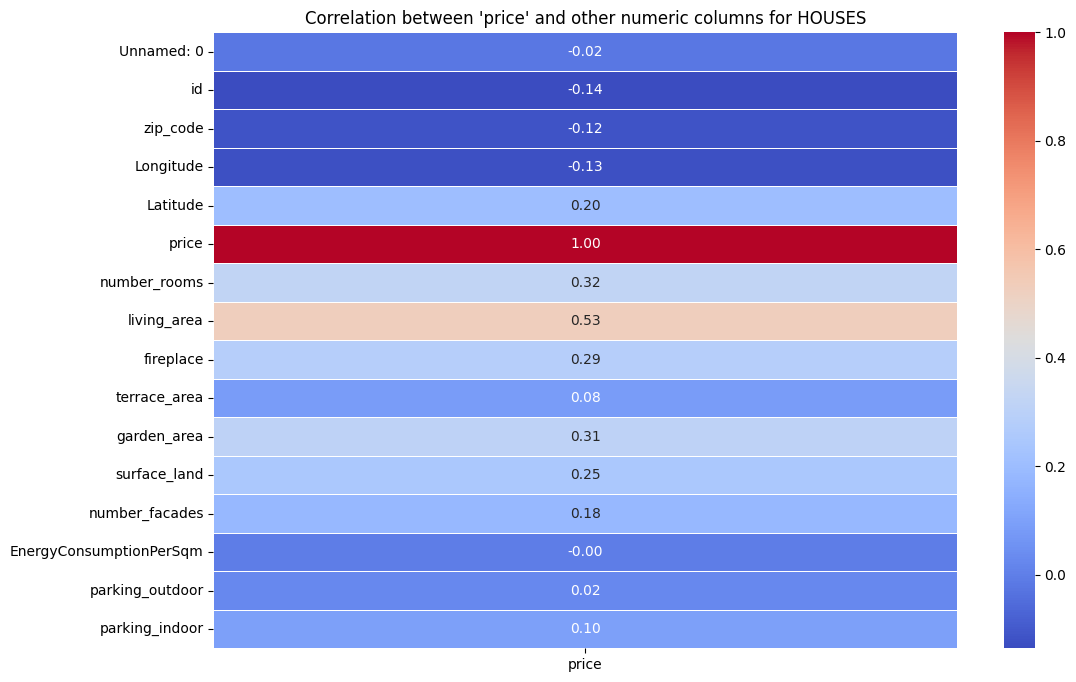

In [43]:
def visualize_price_correlation_heatmap(df, subtype='HOUSE'):
    """
    Visualize the correlation between 'price' and other numeric columns using a heatmap for a specific property subtype.

    Parameters:
        df (DataFrame): Input DataFrame.
        subtype (str): Property subtype to filter the DataFrame (default: 'house').
    """
    # Filter DataFrame by property subtype
    subset_df = df[df['property_subtype'] == subtype]

    # Select only numeric columns
    numeric_df = subset_df.select_dtypes(include='number')

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation between 'price' and other numeric columns for {subtype}S")
    plt.show()

# Assuming 'house_cleaned2' is your DataFrame
visualize_price_correlation_heatmap(house_cleaned2)

## Some graphs

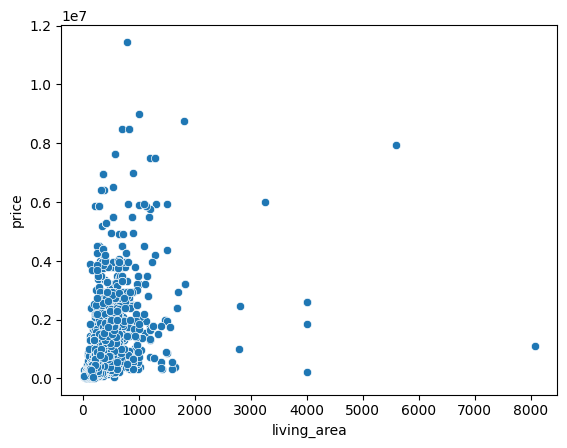

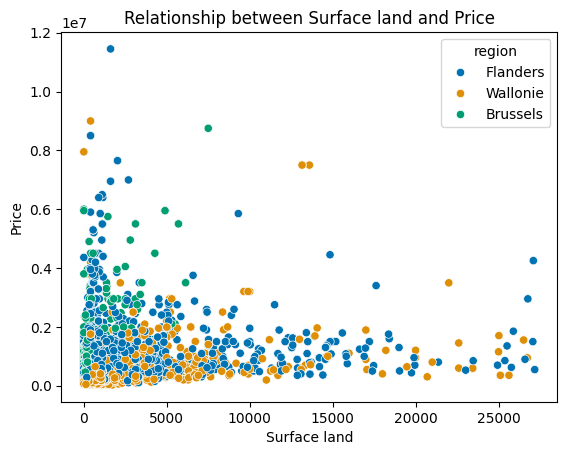

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x="living_area", y="price", data=house_cleaned2)
plt.show()

# customize the scatter plot
# Set the palette using the name of a palette:
sns.set_palette("tab10")
sns.scatterplot(x="surface_land", y="price", hue="region", palette="colorblind", data=house_cleaned2)

# add labels and title
plt.xlabel("Surface land")
plt.ylabel("Price")
plt.title("Relationship between Surface land and Price")

# display the plot
plt.show()

Text(0.5, 1.0, 'Relationship between Building state and Price')

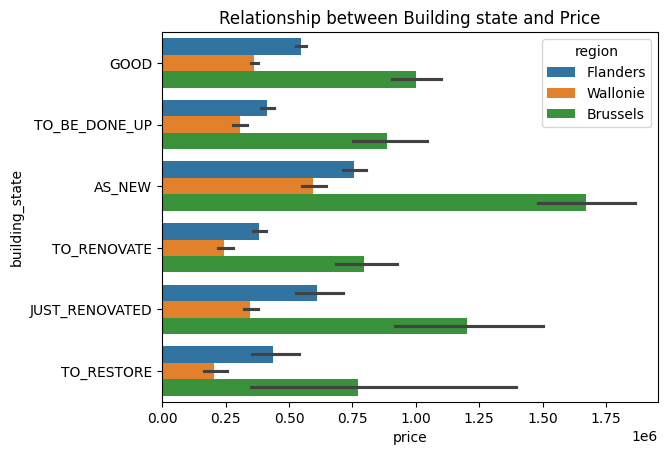

In [46]:
sns.barplot(house_cleaned2, x="price", y="building_state", hue="region", palette="tab10")
plt.title("Relationship between Building state and Price")

In [ ]:
#sns.pairplot(house_cleaned2, hue="property_subtype", palette="tab10")

In [ ]:
list = ['region', 'province', 'price', 'property_type', 'property_subtype']
compare = ['number_rooms', 'living_area', 'fireplace', 'terrace_area', 'garden_area', 
           'surface_land', 'number_facades', 'energy_type', 'EPC_score',
           'EnergyConsumptionPerSqm', 'parking_outdoor', 'parking_indoor']



In [ ]:
#pair = sns.pairplot(house_cleaned2[['number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace', 'terrace',
           #'terrace_area', 'garden', 'garden_area', 'surface_land', 'number_facades',
           #'swimming_pool', 'building_state', 'energy_type', 'EPC_score',
           #'EnergyConsumptionPerSqm', 'parking_outdoor', 'parking_indoor']], diag_kind="hist")
#pair.show()

In [ ]:
column_name = list(house_cleaned.columns)
display(column_name)


['Unnamed: 0',
 'url',
 'id',
 'region',
 'province',
 'locality',
 'zip_code',
 'Longitude',
 'Latitude',
 'property_type',
 'property_subtype',
 'price',
 'number_rooms',
 'living_area',
 'kitchen',
 'furnished',
 'fireplace',
 'terrace',
 'terrace_area',
 'garden',
 'garden_area',
 'surface_land',
 'number_facades',
 'swimming_pool',
 'building_state',
 'energy_type',
 'EPC_score',
 'EnergyConsumptionPerSqm',
 'parking_outdoor',
 'parking_indoor']